In [ ]:
!pip install pandas numpy scikit-learn tensorflow matplotlib seaborn


In [ ]:
import pandas as pd
import numpy as np

# Assuming your dataset is in a CSV format
df = pd.read_csv('/content/sorted_temp_and_rain_dataset.csv')

# Show the first few rows of the dataset
df.head()


,tem,Month,Year,rain
0,16.9760,1,1901,18.5356
1,19.9026,2,1901,16.2548
2,24.3158,3,1901,70.7981
3,28.1834,4,1901,66.1616
4,27.8892,5,1901,267.2150


In [ ]:
# Define the features (X) and target (y)
X = df[['Month', 'Year', 'tem']]  # Added 'tem' (temperature) as a feature
y = df['rain']

# Split the data into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data for models that need it
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Linear Regression Model**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create the model
linear_regressor = LinearRegression()

# Fit the model
linear_regressor.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr = linear_regressor.predict(X_test_scaled)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression MSE:", mse_lr)
print("Linear Regression R^2:", r2_lr)


Linear Regression MSE: 20004.482365579774
Linear Regression R^2: 0.48745629653151046


**Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest MSE:", mse_rf)
print("Random Forest R^2:", r2_rf)


Random Forest MSE: 7421.181542066175
Random Forest R^2: 0.8098586205745917


**Support Vector Machine Model**

In [ ]:
from sklearn.svm import SVR

# Create the model
svm_model = SVR(kernel='rbf')

# Fit the model
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the model
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print("SVM MSE:", mse_svm)
print("SVM R^2:", r2_svm)


SVM MSE: 21285.269363629723
SVM R^2: 0.4546406855430286


**K-Nearest Neighbors Model**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Create the model
knn_model = KNeighborsRegressor(n_neighbors=5)

# Fit the model
knn_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluate the model
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("KNN MSE:", mse_knn)
print("KNN R^2:", r2_knn)


KNN MSE: 7298.057460713011
KNN R^2: 0.8130132371994881


**LSTM Neural Network Model**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Reshape the data to 3D for LSTM (samples, timesteps, features)
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(X_train_lstm, y_train, epochs=200, batch_size=32, verbose=1)

# Make predictions
y_pred_lstm = model.predict(X_test_lstm)

# Evaluate the model
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)

print("LSTM MSE:", mse_lstm)
print("LSTM R^2:", r2_lstm)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 77235.2500
Epoch 2/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 79369.8438
Epoch 3/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 78376.4922
Epoch 4/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 75869.6016
Epoch 5/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 89003.0625
Epoch 6/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 79338.5938
Epoch 7/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 79262.4062
Epoch 8/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 78415.5469
Epoch 9/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 83568.5859
Epoch 10/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 73119.2266
Epoch 11/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 74524.0547
Epoch 12/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 72061.4609
Epoch 13/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 68947.6875
Epoch 14/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 68761.3984
Epoch 15/200
3

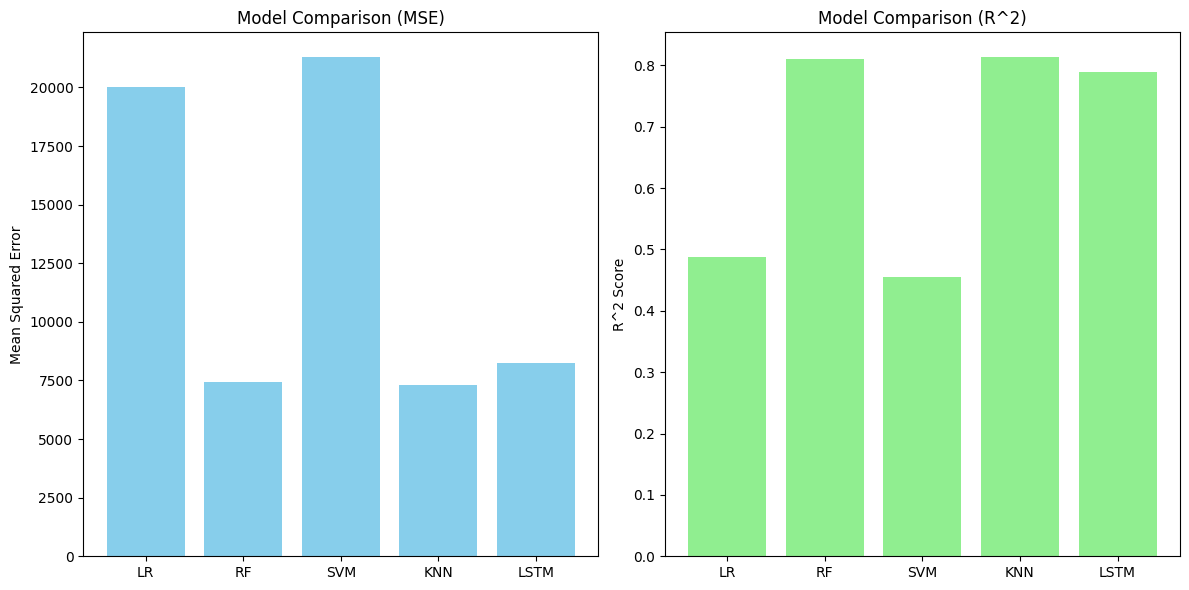

In [ ]:
import matplotlib.pyplot as plt

# Plotting the results
models = ['LR', 'RF', 'SVM', 'KNN', 'LSTM']
mse_values = [mse_lr, mse_rf, mse_svm, mse_knn, mse_lstm]
r2_values = [r2_lr, r2_rf, r2_svm, r2_knn, r2_lstm]

plt.figure(figsize=(12, 6))

# MSE plot
plt.subplot(1, 2, 1)
plt.bar(models, mse_values, color='skyblue')
plt.title('Model Comparison (MSE)')
plt.ylabel('Mean Squared Error')

# R^2 plot
plt.subplot(1, 2, 2)
plt.bar(models, r2_values, color='lightgreen')
plt.title('Model Comparison (R^2)')
plt.ylabel('R^2 Score')

plt.tight_layout()
plt.show()


**ANOMALIE PLOTTING START FROM HERE**

In [ ]:
import numpy as np

# Calculate residuals for KNN and Random Forest
residuals_knn = y_test - y_pred_knn
residuals_rf = y_test - y_pred_rf

# Calculate the mean and standard deviation of the residuals
mean_knn = np.mean(residuals_knn)
std_knn = np.std(residuals_knn)

mean_rf = np.mean(residuals_rf)
std_rf = np.std(residuals_rf)

# Set the threshold for anomalies (e.g., 2 standard deviations above the mean)
threshold_knn = mean_knn + 2 * std_knn
threshold_rf = mean_rf + 2 * std_rf


In [ ]:
# Identify anomalies for KNN and Random Forest
anomalies_knn = residuals_knn > threshold_knn
anomalies_rf = residuals_rf > threshold_rf


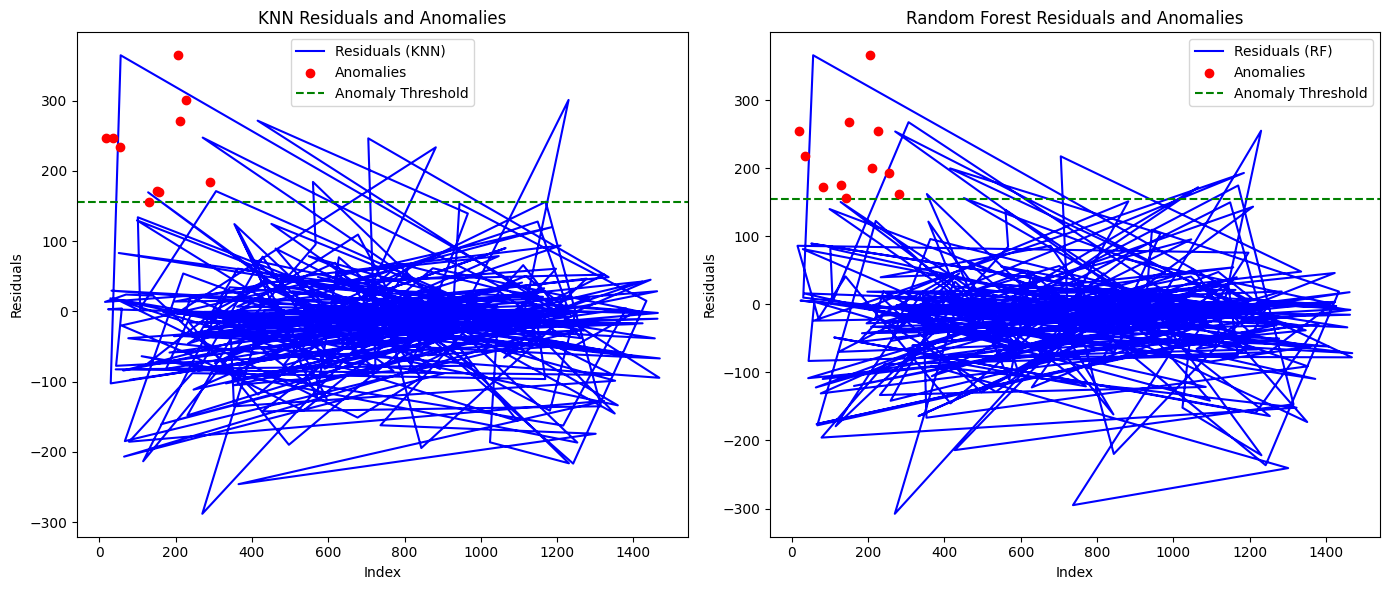

In [ ]:
import matplotlib.pyplot as plt

# Plot for KNN residuals and anomalies
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(residuals_knn, label='Residuals (KNN)', color='blue')
plt.scatter(np.where(anomalies_knn)[0], residuals_knn[anomalies_knn], color='red', label='Anomalies', zorder=5)
plt.axhline(y=threshold_knn, color='green', linestyle='--', label='Anomaly Threshold')
plt.title('KNN Residuals and Anomalies')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.legend()

# Plot for RF residuals and anomalies
plt.subplot(1, 2, 2)
plt.plot(residuals_rf, label='Residuals (RF)', color='blue')
plt.scatter(np.where(anomalies_rf)[0], residuals_rf[anomalies_rf], color='red', label='Anomalies', zorder=5)
plt.axhline(y=threshold_rf, color='green', linestyle='--', label='Anomaly Threshold')
plt.title('Random Forest Residuals and Anomalies')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Example: Manually labeling anomalies in your dataset
true_anomalies = [1 if date in known_anomalous_dates else 0 for date in your_data_dates]


# Assuming you have a true anomaly label (1 for anomaly, 0 for normal)
precision_knn = precision_score(true_anomalies, anomalies_knn)
recall_knn = recall_score(true_anomalies, anomalies_knn)
f1_knn = f1_score(true_anomalies, anomalies_knn)

precision_rf = precision_score(true_anomalies, anomalies_rf)
recall_rf = recall_score(true_anomalies, anomalies_rf)
f1_rf = f1_score(true_anomalies, anomalies_rf)

print(f"KNN Precision: {precision_knn}, Recall: {recall_knn}, F1-score: {f1_knn}")
print(f"Random Forest Precision: {precision_rf}, Recall: {recall_rf}, F1-score: {f1_rf}")

NameError: name 'your_data_dates' is not defined